In [27]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math
import h5py

In [28]:
fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [3]:
df=pd.read_csv('TECAN_210826.csv',delimiter=',',index_col=0)  

In [4]:
df

,1,2,3,4,5,6,7,8,9,10,...,205,206,207,208,209,210,211,212,213,214
Cycle Nr.,,,,,,,,,,,,,,,,,,,,,
Time [s],0.0000,339.0000,678.1000,1017.1000,1356.1000,1695.1000,2132.5000,2471.5000,2810.5000,3149.6000,...,69436.6000,69775.6000,70114.7000,70453.7000,70792.7000,71131.7000,71470.7000,71809.7000,72148.7000,72487.7000
Temp. [C],30.2000,29.7000,30.0000,29.8000,30.1000,30.0000,29.7000,30.1000,29.7000,29.9000,...,30.1000,30.2000,29.9000,29.9000,30.2000,30.1000,30.0000,29.9000,30.0000,30.1000
A1,0.0881,0.0883,0.0883,0.0884,0.0886,0.0889,0.0892,0.0898,0.0898,0.0900,...,0.1530,0.1607,0.1684,0.1768,0.1872,0.1976,0.2101,0.2236,0.2382,0.2520
A2,0.0896,0.0897,0.0896,0.0897,0.0899,0.0901,0.0907,0.0911,0.0911,0.0913,...,0.0909,0.0910,0.0909,0.0909,0.0910,0.0909,0.0909,0.0909,0.0910,0.0908
A3,0.0979,0.0980,0.0984,0.0992,0.1002,0.1006,0.1022,0.1022,0.1027,0.1030,...,0.1045,0.1045,0.1045,0.1048,0.1047,0.1048,0.1048,0.1049,0.1046,0.1049
A4,0.0911,0.0907,0.0907,0.0908,0.0909,0.0912,0.0916,0.0919,0.0922,0.0926,...,0.0943,0.0943,0.0943,0.0943,0.0946,0.0943,0.0942,0.0943,0.0943,0.0943
A5,0.0893,0.0884,0.0884,0.0884,0.0887,0.0888,0.0893,0.0895,0.0898,0.0902,...,0.1299,0.1331,0.1380,0.1424,0.1475,0.1536,0.1603,0.1677,0.1750,0.1831
A6,0.0902,0.0894,0.0894,0.0897,0.0897,0.0899,0.0905,0.0910,0.0913,0.0915,...,0.4455,0.4631,0.4808,0.4971,0.5128,0.5269,0.5421,0.5530,0.5665,0.5795
B1,0.0901,0.0884,0.0884,0.0886,0.0886,0.0889,0.0895,0.0897,0.0898,0.0900,...,0.3149,0.3276,0.3460,0.3648,0.3777,0.3939,0.4099,0.4282,0.4483,0.4659


## check temperature

In [59]:
df.loc['D6'].to_numpy()

array([0.0899, 0.0877, 0.0873, 0.0874, 0.0872, 0.0872, 0.0896, 0.0892,
       0.0881, 0.0879, 0.0879, 0.0901, 0.09  , 0.0901, 0.0901, 0.09  ,
       0.0905, 0.0906, 0.0907, 0.0903, 0.0905, 0.0904, 0.0906, 0.0904,
       0.0906, 0.0906, 0.091 , 0.0904, 0.0904, 0.0906, 0.0906, 0.0905,
       0.0906, 0.0904, 0.0905, 0.0904, 0.0905, 0.0906, 0.0904, 0.0904,
       0.0906, 0.0905, 0.0904, 0.0905, 0.0904, 0.0904, 0.0903, 0.0903,
       0.0904, 0.0904, 0.0905, 0.0904, 0.0904, 0.0905, 0.0904, 0.0905,
       0.0904, 0.0904, 0.0904, 0.0904, 0.0905, 0.0903, 0.0905, 0.0905,
       0.0909, 0.0904, 0.0904, 0.0905, 0.0904, 0.0905, 0.0904, 0.0904,
       0.0905, 0.0904, 0.0903, 0.0905, 0.0905, 0.0903, 0.0903, 0.0904,
       0.0905, 0.0903, 0.0903, 0.0903, 0.0904, 0.0903, 0.0902, 0.0903,
       0.0902, 0.0902, 0.0905, 0.0904, 0.0903, 0.0903, 0.0903, 0.0903,
       0.0901, 0.0904, 0.0903, 0.0906, 0.0901, 0.0903, 0.0903, 0.0901,
       0.0903, 0.09  , 0.0903, 0.0904, 0.0904, 0.0903, 0.0903, 0.0902,
      

Text(0, 0.5, 'Temperature (C)')

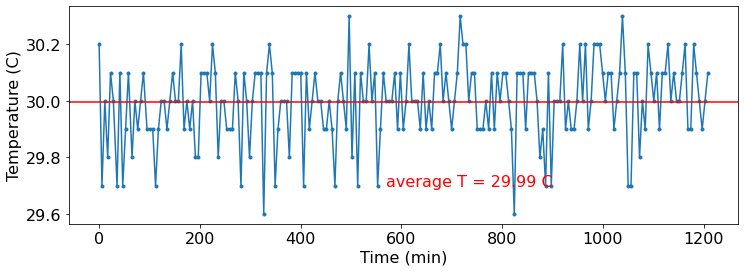

In [11]:
def f_constant(x,c):
    return c
xdata = df.to_numpy()[0]/60;
ydata = df.to_numpy()[1];
param, cov = curve_fit(f_constant, xdata[1:], ydata[1:])
av_T = str(param[0])[:5]
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata, '.-')
plt.axhline(param[0],color='r')
plt.text(570, 29.7, 'average T = '+av_T+' C', color='red')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (C)')

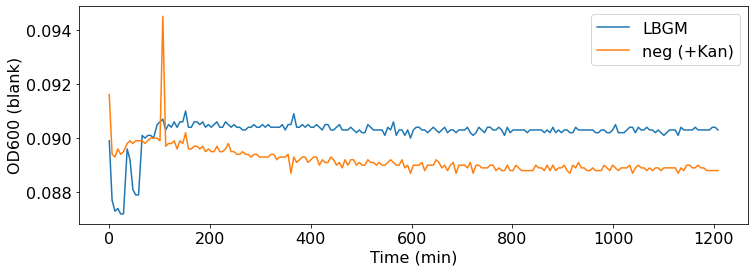

In [67]:
xdata = df.to_numpy()[0]/60;
ydata1 = df.loc['D6'].to_numpy()
ydata2 = df.loc['D5'].to_numpy()
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata1,label='LBGM')
plt.plot(xdata, ydata2,label='neg (+Kan)')
plt.xlabel('Time (min)')
plt.ylabel('OD600 (blank)')
plt.legend()

In [13]:
#idx = np.array([-11,-10,-8,-7,-6,-5,-4,-3,-2,-1]);
idx = np.arange(2,8,1);
idx

array([2, 3, 4, 5, 6, 7])

Text(0.5, 1.0, 'MOI=0.1')

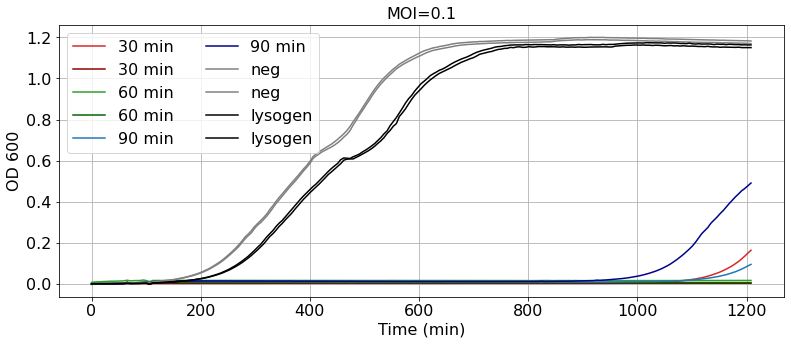

In [68]:
idx = np.arange(2,8,1);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx] - df.loc['D5'].to_numpy()
#labels = df.index[idx].to_list()
labels = ['30 min','30 min','60 min', '60 min', '90 min', '90 min','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']
time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2,loc='upper left')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('MOI=0.1')

Text(0.5, 1.0, 'MOI=1')

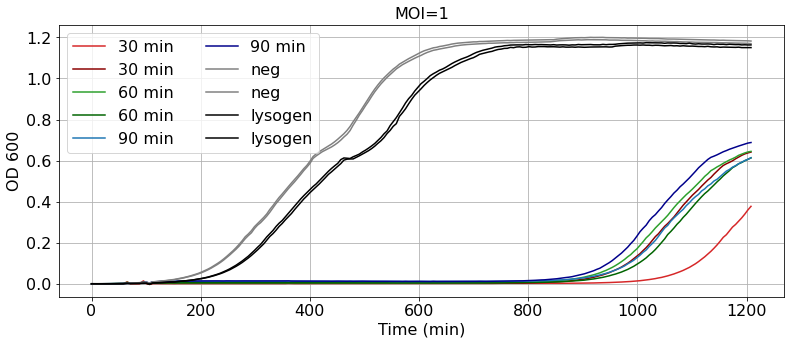

In [69]:
idx = np.arange(8,14,1);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['30 min','30 min','60 min', '60 min', '90 min', '90 min','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('MOI=1')

Text(0.5, 1.0, 'MOI=10')

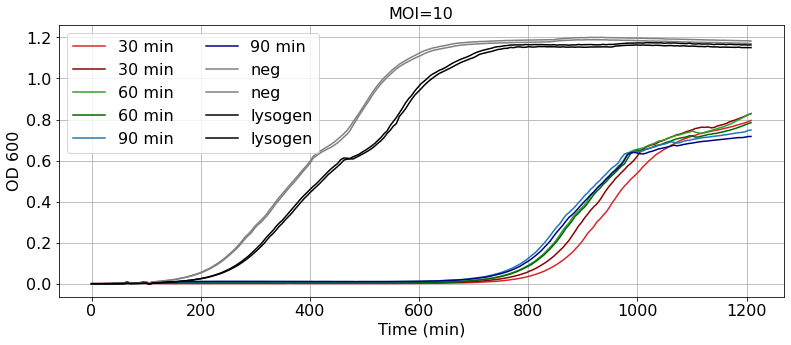

In [70]:
idx = np.arange(14,20,1);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['30 min','30 min','60 min', '60 min', '90 min', '90 min','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('MOI=10')

Text(0.5, 1.0, 'Kan@30 min')

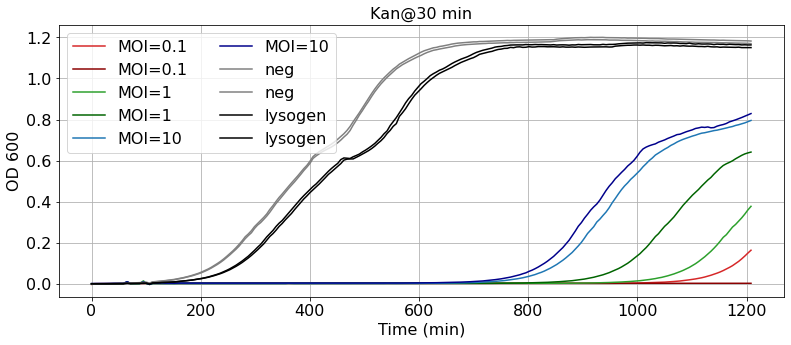

In [71]:
idx = np.array([2,3,8,9,14,15]);
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['MOI=0.1','MOI=0.1','MOI=1', 'MOI=1', 'MOI=10', 'MOI=10','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('Kan@30 min')

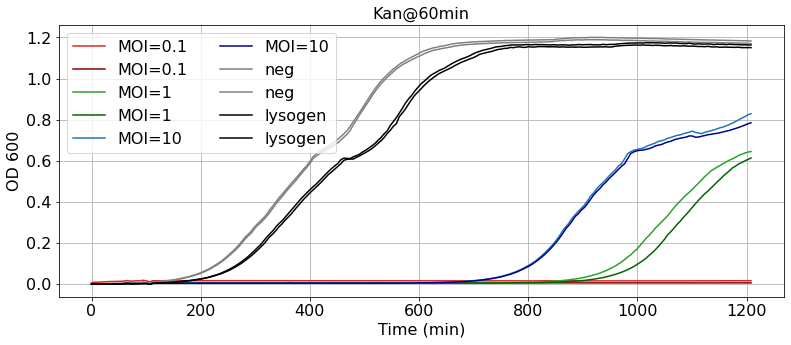

In [72]:
idx = np.array([2,3,8,9,14,15])+2;
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['MOI=0.1','MOI=0.1','MOI=1', 'MOI=1', 'MOI=10', 'MOI=10','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i],color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.title('Kan@60min')
plt.grid('on')

Text(0.5, 1.0, 'Kan@90min')

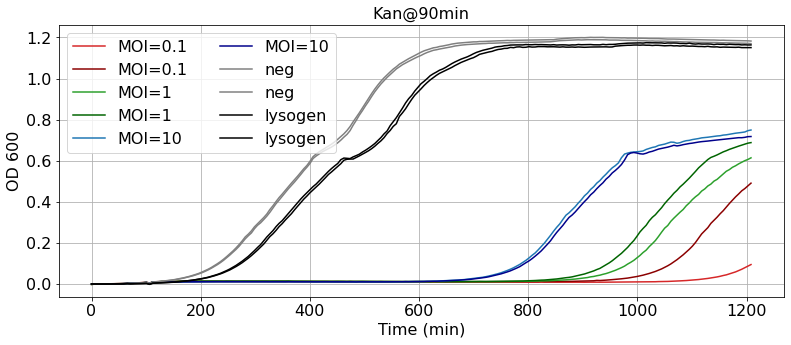

In [73]:
idx = np.array([2,3,8,9,14,15])+4;
idx = np.concatenate((idx, np.array([20,21,22,23])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx]-df.loc['D5'].to_numpy()
labels = ['MOI=0.1','MOI=0.1','MOI=1', 'MOI=1', 'MOI=10', 'MOI=10','neg','neg','lysogen','lysogen']; 
colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']; 

time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (13,5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i],color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=2)
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.title('Kan@90min')